# ETL Technical Challenge

## Overview

Our client wants to set up a source of product order information and he has provided a small set of information that represents less than 3% to process. 

The information is in a .csv format file and has the following characteristics: 

* ORDER_ID               : OrderID
* USER_ID                : UserID
* ORDER_NUMBER           : Order Number
* ORDER_DOW              : Day of the week the order was placed (0-6 with 0 being Sunday and 6 being Saturday)
* ORDER_HOUR_OF_DAY      : Time the order was placed (00-23 hours format) 
* DAYS_SINCE_PRIOR_ORDER : Days since last order
* ORDER_DETAIL           : Order details - Complex column

## Challenge

### Programming Language
Complete the following tasks using Python/Pyspark/Scala and SQL

### Test Aids

The following test aids will be available to be used by interviewees during the challenge:
* Apache Spark API documentation. e.g. https://spark.apache.org/docs/latest/api/scala/org/apache/spark/index.html
* A digital notepad to use during the active challenge time

To use scala notation be sure to install https://pypi.org/project/spylon-kernel/ in your jupyter notebook

### Task 1: Download the data and read the CSV file
The files are located at __[sample-datasets/tree/main/Datasets/Retail/OrderDetails](https://github.com/spunkjockey/sample-datasets/tree/main/Datasets/Retail/OrderDetails)__

In that location you will find 5 files in with ##.csv naming convention 

In [1]:
%%html
<style>
div.output_area pre {
    white-space: pre;
}
</style>

In [5]:
// Your code here

val df = 

df.printSchema()
df.show(5, true)

root
 |-- ORDER_ID: string (nullable = true)
 |-- USER_ID: string (nullable = true)
 |-- ORDER_NUMBER: string (nullable = true)
 |-- ORDER_DOW: string (nullable = true)
 |-- ORDER_HOUR_OF_DAY: string (nullable = true)
 |-- DAYS_SINCE_PRIOR_ORDER: string (nullable = true)
 |-- ORDER_DETAIL: string (nullable = true)

+--------+-------+------------+---------+-----------------+----------------------+--------------------+
|ORDER_ID|USER_ID|ORDER_NUMBER|ORDER_DOW|ORDER_HOUR_OF_DAY|DAYS_SINCE_PRIOR_ORDER|        ORDER_DETAIL|
+--------+-------+------------+---------+-----------------+----------------------+--------------------+
| 1000867| 198377|           5|        0|               14|                   9.0|Triscuit Baked Wh...|
|  100258| 156548|          29|        0|               23|                  15.0|Stage 2 Spinach, ...|
| 1003556|   4233|           4|        0|               09|                   6.0|Gluten Free Rigat...|
| 1006312|   7861|           7|        0|               12|

df: org.apache.spark.sql.DataFrame = [ORDER_ID: string, USER_ID: string ... 5 more fields]


### Task 2: Examine the data
Some cases have been detected where some fields do not come in the expected way (format).

In [6]:
// Your code here


+-------+------------------+------------------+------------------+------------------+------------------+----------------------+--------------------+
|summary|          ORDER_ID|           USER_ID|      ORDER_NUMBER|         ORDER_DOW| ORDER_HOUR_OF_DAY|DAYS_SINCE_PRIOR_ORDER|        ORDER_DETAIL|
+-------+------------------+------------------+------------------+------------------+------------------+----------------------+--------------------+
|  count|             96621|             96621|             96621|             96621|             96621|                 96621|               96621|
|   mean|1702577.4488568737|103264.79841856325|16.593701162273213|2.0985403726708074|13.562010329017502|    17.069684644124983|                null|
| stddev| 989772.4043434119| 59523.63048397165|16.666549931929076| 1.900862306965445| 4.197965169213547|    10.668558054364093|                null|
|    min|                 1|                 1|                10|                 0|                00|  

In [25]:
// Identify invalid ORDER_DOW (valid values must be between 0 and 6) and create ORDER_DOW_DQ to mark the errored records
val df1 = 

df1.show(5)

+--------+-------+------------+---------+-----------------+----------------------+--------------------+------------+
|ORDER_ID|USER_ID|ORDER_NUMBER|ORDER_DOW|ORDER_HOUR_OF_DAY|DAYS_SINCE_PRIOR_ORDER|        ORDER_DETAIL|ORDER_DOW_DQ|
+--------+-------+------------+---------+-----------------+----------------------+--------------------+------------+
| 1000867| 198377|           5|        0|               14|                   9.0|Triscuit Baked Wh...|        null|
|  100258| 156548|          29|        0|               23|                  15.0|Stage 2 Spinach, ...|        null|
| 1003556|   4233|           4|        0|               09|                   6.0|Gluten Free Rigat...|        null|
| 1006312|   7861|           7|        0|               12|                  30.0|Condensed Cream o...|        null|
| 1014295| 144587|           6|        0|               09|                   8.0|Pure Irish Butter...|        null|
+--------+-------+------------+---------+-----------------+-----

df1: org.apache.spark.sql.DataFrame = [ORDER_ID: string, USER_ID: string ... 6 more fields]


In [28]:
// Identify invalid ORDER_HOUR_OF_DAY (valid values must be between 0 and 23) and create ORDER_HOUR_OF_DAY_DQ to mark the errored records
val df2 = 
df2.show(5)

+--------+-------+------------+---------+-----------------+----------------------+--------------------+------------+--------------------+
|ORDER_ID|USER_ID|ORDER_NUMBER|ORDER_DOW|ORDER_HOUR_OF_DAY|DAYS_SINCE_PRIOR_ORDER|        ORDER_DETAIL|ORDER_DOW_DQ|ORDER_HOUR_OF_DAY_DQ|
+--------+-------+------------+---------+-----------------+----------------------+--------------------+------------+--------------------+
| 1000867| 198377|           5|        0|               14|                   9.0|Triscuit Baked Wh...|        null|                null|
|  100258| 156548|          29|        0|               23|                  15.0|Stage 2 Spinach, ...|        null|                null|
| 1003556|   4233|           4|        0|               09|                   6.0|Gluten Free Rigat...|        null|                null|
| 1006312|   7861|           7|        0|               12|                  30.0|Condensed Cream o...|        null|                null|
| 1014295| 144587|           6|   

import org.apache.spark.sql.types._
df2: org.apache.spark.sql.DataFrame = [ORDER_ID: string, USER_ID: string ... 7 more fields]


In [37]:
// Split the df in two different dataframes successDF and failureDF
// For successDF drop *_DQ columns just created
val successDF =
successDF.show(5)

val failureDF =
failureDF.show(5)

+--------+-------+------------+---------+-----------------+----------------------+--------------------+
|ORDER_ID|USER_ID|ORDER_NUMBER|ORDER_DOW|ORDER_HOUR_OF_DAY|DAYS_SINCE_PRIOR_ORDER|        ORDER_DETAIL|
+--------+-------+------------+---------+-----------------+----------------------+--------------------+
| 1000867| 198377|           5|        0|               14|                   9.0|Triscuit Baked Wh...|
|  100258| 156548|          29|        0|               23|                  15.0|Stage 2 Spinach, ...|
| 1003556|   4233|           4|        0|               09|                   6.0|Gluten Free Rigat...|
| 1006312|   7861|           7|        0|               12|                  30.0|Condensed Cream o...|
| 1014295| 144587|           6|        0|               09|                   8.0|Pure Irish Butter...|
+--------+-------+------------+---------+-----------------+----------------------+--------------------+
only showing top 5 rows

+--------+-------+------------+--------

successDF: org.apache.spark.sql.DataFrame = [ORDER_ID: string, USER_ID: string ... 5 more fields]
failureDF: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [ORDER_ID: string, USER_ID: string ... 7 more fields]


In [3]:
// write failureDF in parquet format in the following path order_detail/failure
val path: String = "order_detail/failure"


path: String = order_detail/failure


### Task 3: Parse the ORDER_DETAIL column

* Each order detail is separated by the tilde symbol (~)
* The order detail has the following struct separeted by the pipe symbol (|): Product|Aisles|Products Sold

e.g.
```
+--------+---------------------------------+
|order_id|order_detail                     |
+--------+---------------------------------+
|100     |banana|fruits|5~apple|fruits|10  |
|102     |nutter butter cookies|crackers|6 |
+--------+---------------------------------+
```


The user has provided an example of the expected detail:

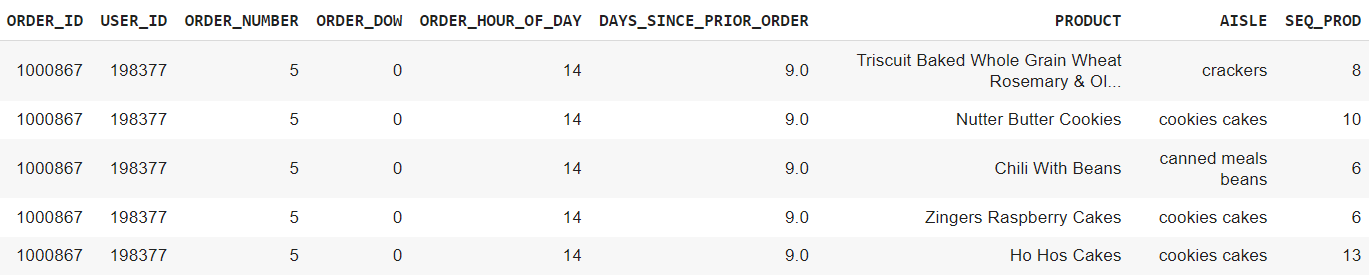

In [45]:
/** Your code here **/

val orderDetailsDF = 

orderDetailsDF: org.apache.spark.sql.DataFrame = [ORDER_ID: bigint, USER_ID: bigint ... 7 more fields]


### Task 4: Perform a count of rows
To validate if the the table was sucesfully parsed we are required to count the total of rows, please use the below code as an example

In [47]:
/** Your code here expected result = 1021460 rows*/


+-------+------------------+------------------+------------------+------------------+------------------+----------------------+--------------------+--------------------+-----------------+
|summary|          ORDER_ID|           USER_ID|      ORDER_NUMBER|         ORDER_DOW| ORDER_HOUR_OF_DAY|DAYS_SINCE_PRIOR_ORDER|             PRODUCT|              AISLES|    PRODUCTS_SOLD|
+-------+------------------+------------------+------------------+------------------+------------------+----------------------+--------------------+--------------------+-----------------+
|  count|           1021460|           1021460|           1021460|           1021460|           1021460|               1021460|             1021460|             1021303|          1020722|
|   mean|1705575.4179449023|103237.51440976642|17.064443052101893|1.9871899046462906|13.542067237092006|     17.08249270651812|   995.8888888888889|                null|7.501021825727279|
| stddev| 989564.6664421173| 59430.34767183011|16.6045323472

### Task 5: Analize
The customer wants to have the details of each product processed by each order. Identify the following:
1. The comparison between the aisles with the most products versus the best-selling product

In [ ]:
/* Your code here */

2. The top ten best selling products

In [ ]:
/* Your code here */

3. The days of the week with the highest number of orders processed
```Sql
  SELECT ORDER_DOW, COUNT(DISTINCT ORDER_ID) AS ORDERS
    FROM ORDER_DETAILS
GROUP BY ORDER_DOW
ORDER BY ORDERS DESC
```

In [ ]:
/* Your code here */

4. View the number of orders per day and hour
```Sql
SELECT * FROM (
  SELECT ORDER_DOW, ORDER_HOUR_OF_DAY, COUNT(DISTINCT ORDER_ID) AS ORDERS
    FROM ORDER_DETAILS
GROUP BY ORDER_DOW, ORDER_HOUR_OF_DAY)
   PIVOT SUM(ORDERS) FOR ORDER_DOW in ('0' as "Sunday", '1' as "Monday", ... '6' as "Saturday")
ORDER BY 1
```

In [ ]:
/* Your code here */